<a href="https://colab.research.google.com/github/juliokantarelly/Grafos-UFCG/blob/main/03_Introdu%C3%A7%C3%A3o_a_NetworkX_Notas_de_Aula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução a NetworkX (continuação)

**Notas de Aula de Teoria dos Grafos**

Prof<sup>a</sup> Patrícia D. L. Machado

UFCG – Unidade Acadêmica de Sistemas e Computação

Neste documento, introduzimos as abstrações `NodeView` e `EdgeView` e mostramos como são utilizadas para iterar os conjuntos de vértices e arestas, bem como para acesso e modificação a atributos.

> <font face="Monospace" size=2>
O bloco de código abaixo instala pacotes utilizados neste notebook. No menu principal, clique em `Ambiente de Execução` -> `Executar tudo` para (re-)carregar as imagens utilizadas neste notebook, se necessário. Para (re-)inicializar todo o notebook, limpando os dados atuais, selecione, no menu principal, `Ambiente de Execução` -> `Desconectar e excluir ambiente de execução`.
</font>

In [ ]:
# @title  { display-mode: "form" }
import os.path as opath
if not opath.exists('gtufcg'):
  !git clone https://github.com/pdlmachado/gtufcg.git
import networkx as nx
!pip show networkx
# Pacotes auxiliares
import matplotlib.pyplot as plt
from gtufcg.util.draw_util import draw_graph, drawgv_graph
from gtufcg.util.import_util import read_multiple_CSV

Cloning into 'gtufcg'...
remote: Enumerating objects: 1206, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 1206 (delta 21), reused 0 (delta 0), pack-reused 1169 (from 3)
Receiving objects: 100% (1206/1206), 1.90 MiB | 6.96 MiB/s, done.
Resolving deltas: 100% (801/801), done.
Name: networkx
Version: 3.5
Summary: Python package for creating and manipulating graphs and networks
Home-page: https://networkx.org/
Author: 
Author-email: Aric Hagberg <hagberg@lanl.gov>
License: 
Location: /usr/local/lib/python3.11/dist-packages
Requires: 
Required-by: hyperopt, nx-cugraph-cu12, python-louvain, scikit-image, spanner-graph-notebook, torch


## NodeView

`NodeView` é um objeto de visualização dinâmica que fornece acesso aos vértices de um grafo de forma eficiente. Ele funciona como uma interface semelhante a um conjunto (set) ou dicionário, permitindo a iteração sobre o conjunto, o acesso e a modificação a atributos dos vértices como em um dicionário.

Seja `G` um grafo:

* `G.nodes` - retorna um `NodeView` como um iterador sobre identificadores dos vértices

* `G.nodes[v]` - retorna um dicionário com os atributos do vértice `v`

* `G.nodes(data = True)` - retorna um `NodeView` como um  iterador os sobre vértices no formato de tuplas (`v`, `attr`), onde `attr` é o dicionário de atributos de `v`

* `G.nodes(data="size")` - retorna um iterador com tuplas (`v`, valor do atributo `size`)




## EdgeView

`EdgeView` é um objeto para visualização dinâmica de arestas de um grafo. Assim como `NodeView`, permite acessar, iterar e modificar atributos de arestas como um dicionário.

Seja `G` um grafo:

* `G.edges` - retorna um `EdgeView` como um iterador sobre tuplas com identificadores dos vértices que são terminais das arestas

* `G.edges[u][v]` - retorna um dicionário com os atributos da aresta entre `u` `v`. Se for um multigrafo, usamos `G.edges[u][v][k]` para identificar a aresta específica.

* `G.edges(data = True)` - retorna um `EdgeView` como um  iterador as arestas no formato de tuplas (`u`, `v`, `attr`), onde `attr` é o dicionário de atributos da arestas entre `u` e `v`

* `G.edges(data="size")` - retorna um iterador com tuplas (`u`, `v`, valor do atributo `size`)

## Iterando sobre vértices e arestas


A maneira mais simples de iterar sobre os vértices e arestas do grafo é utilizando os *iterators* sobre vértices e arestas retornados pelos métodos `nodes` e   `edges` da class [Graph](https://networkx.org/documentation/stable/reference/classes/index.html#graph-types). Mais informações sobre [iterators em Python](https://docs.python.org/3/tutorial/classes.html#iterators))

A seguir, apresentamos exemplos, usando o comando *for* e *list comprehension*. Comandos baseados em *list comprehension* são mais otimizados em Python. Portanto, é interessante, sempre que possível priorizar seu uso. Mas, para efeitos desta disciplina, seu uso, em detrimento de comandos clássicos de repetição, é opcional.
Abaixo, a visualização gráfica do grafo utilizado nos trechos de código desta seção. Teste os trechos de código com diferentes grafos.

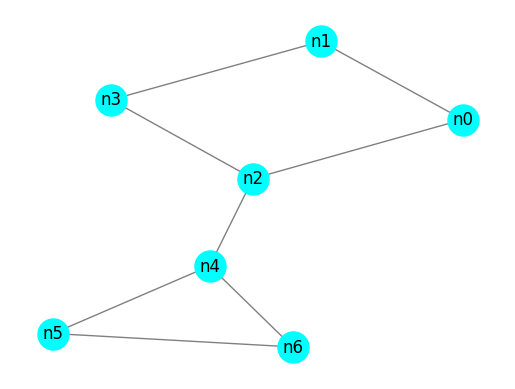

In [ ]:
#@title  { run: "auto" }
filename1 = "s-u-cy-sc-p-05.graphml" #@param ["m-u-cy-sc-p-01.graphml", "p-u-cy-sc-p-ch-01.graphml", "s-u-cy-sc-p-01.graphml", "s-u-cy-sc-p-05.graphml", "s-u-a-sc-p-t-b-03.graphml", "s-u-cy-sc-p-06.graphml", "s-u-cy-sc-p-b-01.graphml", "s-u-cy-sc-p-03.graphml", "K3-3.graphml", "K1.graphml", "Cycle6.graphml", "Empty6.graphml"]
layout1 = "kamada_kawai_layout" # @param ["circular_layout","kamada_kawai_layout","random_layout","shell_layout","spring_layout","spectral_layout","spiral_layout","arf_layout","forceatlas2_layout"]

# Importando e desenhando o Grafo
G1 = nx.read_graphml("gtufcg/graphs/"+filename1)
draw_graph(G1,layoutid=layout1)

Abaixo, utilizamos o método [neighbors](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.neighbors.html#graph-neighbors) que retorna um iterador sobre a coleção de vizinhos de um vértice `v`. Um iterator é um objeto que retorna, um a um, os elementos de uma coleção; para cada chamada, um elemento é retornado. Para imprimir a coleção completa de vizinhos como uma lista, invocamos a função *list* sobre o iterator retornado por neighbors.

In [ ]:
print("Vizinhos: ")
for v in G1.nodes:
  # neighbors retorna um iterator; função list cria a lista dos elementos
  print(f"  {v}: {list(G1.neighbors(v))}")

Vizinhos: 
  n0: ['n2', 'n1']
  n1: ['n0', 'n3']
  n2: ['n0', 'n3', 'n4']
  n3: ['n1', 'n2']
  n4: ['n2', 'n5', 'n6']
  n5: ['n4', 'n6']
  n6: ['n4', 'n5']


A seguir queremos imprimir os vizinhos comuns de dois vértices que são adjacentes. Assim, utilizamos um iterador para as arestas dos grafo. Como arestas são diferentes em instâncias de *Graph* e *MultiGraph*, no comando *for* cada elemento de `G1.edges` é instanciado para `u`, `v` (vértices terminais) para grafo da classe *Graph* ou, no caso de termos um multigrafo, `u`, `v` e `k` (identificador da aresta). O argumento `*k` é opcional. Assim, usamos um mesmo trecho de código para tratar grafos de classes diferentes.

In [ ]:
print("\nVizinhos comuns ...")
for u,v,*k in G1.edges: # k é o identificador de aresta em objetos MultiGraph
  # common_neighbors retorna um generator (tipo especial de iterator que é
  # lazy) list força a construção da lista de elementos
  print(f"...entre {u} e {v}: {list(nx.common_neighbors(G1,u,v))}")



Vizinhos comuns ...
...entre n0 e n2: []
...entre n0 e n1: []
...entre n1 e n3: []
...entre n2 e n3: []
...entre n2 e n4: []
...entre n4 e n5: ['n6']
...entre n4 e n6: ['n5']
...entre n5 e n6: ['n4']


Por fim,  usamos *for* e *list comprehension* para criar uma lista com os graus dos vértices do grafo. Depois aplicamos funções de Python para calcular o valor máximo, mínimo e a média dos valores em uma lista.
Os dois primeiros trechos de código realizam a mesma computação, mas de formas alternativas.

In [ ]:
degrees = [G1.degree(v) for v in G1.nodes]

In [ ]:
degrees = []
for v in G1.nodes:
  degrees.append(G1.degree(v))

In [ ]:
print(f"\nGrau máximo do grafo: {max(degrees)}")
print(f"Grau mínimo do grafo: {min(degrees)}")
print(f"Grau médio do grafo: {sum(degrees)/G1.number_of_nodes():.2f}")


Grau máximo do grafo: 3
Grau mínimo do grafo: 2
Grau médio do grafo: 2.29


## Acessando e modificando atributos de vértices

Para referenciar um **vértice**, usamos o seu identificador. Para acessar diretamente os atributos de vértices, criar ou modificar, invocamos o método **nodes** usando a seguinte sintaxe:

    G.nodes[v][attr]

 onde `G` é o grafo, `v` é o identificador do vértice e `attr` é o identificador do atributo.





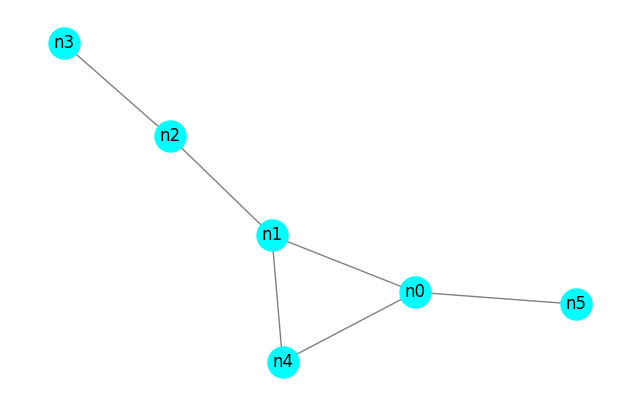

Dicionário com labels dos vértices (antes): {'n0': '6', 'n1': '5', 'n2': '4', 'n3': '3', 'n4': '2', 'n5': '1'}
Dicionário com labels dos vértices (novo): {'n0': 'v6', 'n1': 'v5', 'n2': 'v4', 'n3': 'v3', 'n4': 'v2', 'n5': 'v1'}



In [ ]:
#@title  { run: "auto", vertical-output: true }
filename2 = "s-u-cy-sc-p-01.graphml" #@param ["m-u-cy-sc-p-01.graphml", "p-u-cy-sc-p-ch-01.graphml", "s-u-cy-sc-p-01.graphml", "s-u-cy-sc-p-05.graphml", "s-u-a-sc-p-t-b-03.graphml", "s-u-cy-sc-p-06.graphml", "s-u-cy-sc-p-b-01.graphml", "s-u-cy-sc-p-03.graphml", "K3-3.graphml", "Cycle6.graphml", "Empty6.graphml"]
layout2 = "kamada_kawai_layout" #@param ["circular_layout", "kamada_kawai_layout", "random_layout", "shell_layout", "spring_layout", "spectral_layout", "spiral_layout", "arf_layout", "forceatlas2_layout"]

# Importando e desenhando o grafo
G2 = nx.read_graphml("gtufcg/graphs/"+filename2)
draw_graph(G2,layoutid=layout2)

# Acessando e modificando o atributo label dos vértices
print(f"Dicionário com labels dos vértices (antes): {nx.get_node_attributes(G2,'label')}")
# Alterando o label dos vértices
for v in G2.nodes:
  G2.nodes[v]['label'] = 'v' + G2.nodes[v]['label']
print(f"Dicionário com labels dos vértices (novo): {nx.get_node_attributes(G2,'label')}\n")



## Acessando e modificando atributos de arestas

Para referenciar uma **aresta** em grafos do tipo *Graph* ou *DiGraph*, usamos uma tupla `(u,v)` com os identificadores dos seus terminais,  `u` e `v`. Para grafos do tipo *MultiGraph* ou *DiMultiGraph* a tupla terá um valor a mais, por exemplo `(u,v,k)` onde `k` é o identificador da aresta, visto que estes grafos possuem arestas paralelas. Para acessar o conjunto de atributos, criar ou modificar um atributo de aresta, usamos a seguinte sintaxe:

    G[source][target][attr] (GRAFO SIMPLES)
    G[source][target][iedge][attr] (MULTIGRAFOS)

onde `G` é o grafo, `source` e `target` são os terminais da aresta, `iedge` é o identificador da aresta e `attr` é o atributo. Caso o `attr` não seja definido, o resultado é o dicionário de atributos da aresta, se o grafo for instância da class *Graph*, ou um dicionário de arestas, indexado pelo identificador da aresta, se o grafo for instância da class *MultiGraph*.

Nos exemplos abaixo, mostramos onde o tratamento será diferente caso o grafo seja uma instância de *Graph* ou *MultiGraph*.

Tipo do grafo: <class 'networkx.classes.multigraph.MultiGraph'>


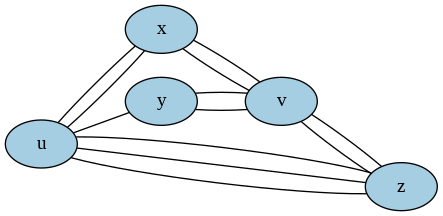

Aresta(s) entre n2 e n3: {'e6': {'description': ''}, 'e7': {'description': ''}}

Dicionário com labels das arestas (antes): [('n0', 'n1', {'description': ''}), ('n0', 'n1', {'description': ''}), ('n0', 'n4', {'description': ''}), ('n0', 'n4', {'description': ''}), ('n0', 'n4', {'description': ''}), ('n0', 'n2', {'description': ''}), ('n1', 'n3', {'description': ''}), ('n1', 'n3', {'description': ''}), ('n2', 'n3', {'description': ''}), ('n2', 'n3', {'description': ''}), ('n3', 'n4', {'description': ''}), ('n3', 'n4', {'description': ''})]
Dicionário com labels das arestas (novo): [('n0', 'n1', {'description': '', 'label': 'uxe0'}), ('n0', 'n1', {'description': '', 'label': 'uxe1'}), ('n0', 'n4', {'description': '', 'label': 'uze2'}), ('n0', 'n4', {'description': '', 'label': 'uze3'}), ('n0', 'n4', {'description': '', 'label': 'uze4'}), ('n0', 'n2', {'description': '', 'label': 'uye5'}), ('n1', 'n3', {'description': '', 'label': 'xve10'}), ('n1', 'n3', {'description': '', 'label': 'xve1

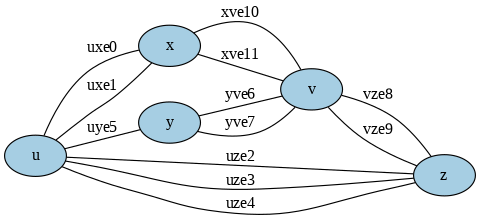

In [ ]:
#@title  { run: "auto", vertical-output: true }
filename3 = "m-u-cy-sc-p-01.graphml" # @param ["m-u-cy-sc-p-01.graphml","p-u-cy-sc-p-ch-01.graphml","s-u-cy-sc-p-01.graphml","s-u-cy-sc-p-05.graphml","s-u-a-sc-p-t-b-03.graphml","s-u-cy-sc-p-06.graphml","s-u-cy-sc-p-b-01.graphml","s-u-cy-sc-p-03.graphml","K3-3.graphml","K5.graphml","Cycle6.graphml","Empty6.graphml"]
layout3 = "dot" #@param ["neato", "dot", "fdp", "sfdp", "circo", "twopi", "osage"]

# Importando e desenhando o grafo
G3 = nx.read_graphml("gtufcg/graphs/"+filename3)
print(f"Tipo do grafo: {type(G3)}")
drawgv_graph(G3, layoutid=layout3, with_edge_labels=True, with_node_labels=True)


# Imprimindo arestas (quando existir) entre os vértices u e v
# Se Graph, imprime o dicionário de atributos da aresta
# Se Multigraph, imprime um dicionário de arestas, indexado pelo identificador da aresta
u = list(G3.nodes)[2]
v = list(G3.nodes)[3]
if G3.number_of_edges(u,v) >= 1:
  print(f"Aresta(s) entre {u} e {v}: {G3[u][v]}") # a ordem em que u e v são considerados não importa

# Adicionando o atributo 'label' a arestas
print(f"\nDicionário com labels das arestas (antes): {G3.edges(data=True)}")
if type(G3) is nx.classes.multigraph.MultiGraph: #Class Multigraph
  for u,v,k in G3.edges: # necessário referenciar também o id da aresta
    G3[u][v][k]['label'] = G3.nodes[u]['label'] + G3.nodes[v]['label'] + str(k)
  print(f"Dicionário com labels das arestas (novo): {G3.edges(data=True)}")
else: # Class Graph
  for u,v in G3.edges: # arestas não têm id
    G3[u][v]['label'] = G3.nodes[u]['label'] + G3.nodes[v]['label']
  print(f"Dicionário com labels das arestas (novo): {G3.edges(data=True)}")
drawgv_graph(G3,layoutid=layout3, with_edge_labels=True, with_node_labels=True)
